<a href="https://colab.research.google.com/github/juliomestas/Ciencia_y_analitica_de_datos/blob/main/Actividad4EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 4**
Exploración de datos

---

*   NOMBRE:  JULIO CESAR MESTAS DELGADO
*   MATRÍCULA: A01794827

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
DIR = "/content/drive/MyDrive/Documentos/Tec de Monterrey/MNA/Ciencia y analitica de datos/Semana 4"
os.chdir(DIR)

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# **Parte 1**. Análisis descriptivo (univariante)

1. Utiliza el método `info()` del dataframe, para obtener el resumen de los tipos de datos. ¿Cuántas columnas son numéricas y cuántas cualitativas?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


**Columnas Numéricas**:

1.   person_age (int64)
2.   person_income (int64)
3.   person_emp_length (float64)
4.   loan_amnt (int64)
5.   loan_int_rate (float64)
6.   loan_status (int64)
7.   loan_percent_income (float64)
8.   cb_person_cred_hist_length (int64)

**Columnas Cualitativas :**


1.   person_home_ownership (object)
2.   loan_intent (object)
3.   loan_grade (object)
4.   cb_person_default_on_file (object)

 2. Determina el porcentaje de valores faltantes por columna.

In [6]:
# Calcular el porcentaje de valores faltantes por columna
porcentaje_faltantes = (df.isnull().sum() / len(df)) * 100
porcentaje_faltantes_df = pd.DataFrame({'Columna': df.columns, 'Porcentaje Faltante': porcentaje_faltantes})
print(porcentaje_faltantes_df)

                                               Columna  Porcentaje Faltante
person_age                                  person_age             0.000000
person_income                            person_income             0.000000
person_home_ownership            person_home_ownership             0.000000
person_emp_length                    person_emp_length             2.747000
loan_intent                                loan_intent             0.000000
loan_grade                                  loan_grade             0.000000
loan_amnt                                    loan_amnt             0.000000
loan_int_rate                            loan_int_rate             9.563856
loan_status                                loan_status             0.000000
loan_percent_income                loan_percent_income             0.000000
cb_person_default_on_file    cb_person_default_on_file             0.000000
cb_person_cred_hist_length  cb_person_cred_hist_length             0.000000


# Análisis de variables numéricas

3. Obtén las siguientes estadísticas descriptivas para todas las variables numéricas:
*   Tendencia central (media, mediana)
*   Dispersión o variabilidad (min, max, desviación estándar, cuartiles)
*   Forma (asimetría y curtosis)
*   Clasifica las variables `person_age` y `loan_in_rate` según los valores observados de asimetría y curtosis

**NOTA**. Recuerda que muchas de estas estadísticas, puedes obtenerlas utilizando la función `describe()` y que la mediana está representada en el 2do cuartil (50%)

In [20]:
#Tendencia central (media, mediana)

columnas_numericas = df.select_dtypes(include=['number'])
media = columnas_numericas.mean()
mediana = columnas_numericas.median()

tendencia_central = pd.DataFrame({'Variable': columnas_numericas.columns, 'Media': media, 'Mediana': mediana})
print(tendencia_central)

                                              Variable         Media   Mediana
person_age                                  person_age     27.734600     26.00
person_income                            person_income  66074.848470  55000.00
person_emp_length                    person_emp_length      4.789686      4.00
loan_amnt                                    loan_amnt   9589.371106   8000.00
loan_int_rate                            loan_int_rate     11.011695     10.99
loan_status                                loan_status      0.218164      0.00
loan_percent_income                loan_percent_income      0.170203      0.15
cb_person_cred_hist_length  cb_person_cred_hist_length      5.804211      4.00


In [21]:
# Dispersión o variabilidad (min, max, desviación estándar, cuartiles)
descripcion = df.describe()

# Mostrar estadísticas descriptivas
print("Estadísticas Descriptivas: (min, max, desviación estándar, cuartiles)")
print(descripcion)

Estadísticas Descriptivas: (min, max, desviación estándar, cuartiles)
         person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.00000

In [23]:
# Forma (asimetría y curtosis)
# Calcular la asimetría
asimetria = columnas_numericas.skew()

# Calcular la curtosis
curtosis = columnas_numericas.kurtosis()

medidas_forma = pd.DataFrame({'Variable': columnas_numericas.columns, 'Asimetría': asimetria, 'Curtosis': curtosis})
print(medidas_forma)

                                              Variable  Asimetría     Curtosis
person_age                                  person_age   2.581393    18.560825
person_income                            person_income  32.865349  2693.272776
person_emp_length                    person_emp_length   2.614455    43.722338
loan_amnt                                    loan_amnt   1.192477     1.423565
loan_int_rate                            loan_int_rate   0.208550    -0.671609
loan_status                                loan_status   1.364888    -0.137088
loan_percent_income                loan_percent_income   1.064669     1.223687
cb_person_cred_hist_length  cb_person_cred_hist_length   1.661790     3.716194


In [24]:
#Clasifica las variables person_age y loan_in_rate según los valores observados de asimetría y curtosis
# Calcular la asimetría y la curtosis para person_age y loan_int_rate
asimetria_age = df['person_age'].skew()
asimetria_rate = df['loan_int_rate'].skew()
curtosis_age = df['person_age'].kurtosis()
curtosis_rate = df['loan_int_rate'].kurtosis()

# Clasificar person_age según asimetría y curtosis
clasificacion_age = ""
if asimetria_age > 0:
    clasificacion_age += "Positivamente asimétrica"
elif asimetria_age < 0:
    clasificacion_age += "Negativamente asimétrica"
else:
    clasificacion_age += "Simétrica"

if curtosis_age > 0:
    clasificacion_age += ", Leptocúrtica"
elif curtosis_age < 0:
    clasificacion_age += ", Platicúrtica"
else:
    clasificacion_age += ", Mesocúrtica (similar a la normal)"

# Clasificar loan_int_rate según asimetría y curtosis
clasificacion_rate = ""
if asimetria_rate > 0:
    clasificacion_rate += "Positivamente asimétrica"
elif asimetria_rate < 0:
    clasificacion_rate += "Negativamente asimétrica"
else:
    clasificacion_rate += "Simétrica"

if curtosis_rate > 0:
    clasificacion_rate += ", Leptocúrtica"
elif curtosis_rate < 0:
    clasificacion_rate += ", Platicúrtica"
else:
    clasificacion_rate += ", Mesocúrtica (similar a la normal)"

# Mostrar clasificación
print("Clasificación de person_age:", clasificacion_age)
print("Clasificación de loan_int_rate:", clasificacion_rate)

Clasificación de person_age: Positivamente asimétrica, Leptocúrtica
Clasificación de loan_int_rate: Positivamente asimétrica, Platicúrtica


4. Utiliza histogramas para determinar la distribución de los valores representados en cada variable.
*   ¿Se corresponde con lo obtenido en el cálculo de asimetría? Como verás, los datos reales son más complejos que la teoría. Por esta razón, recuerda siempre acompañar el análisis de la asimetría con algún gráfico como un histograma.

**NOTA**. Para esto también puedes ocupar los gráficos `kde` ([kernel density estimation](https://www.cienciadedatos.net/documentos/pystats02-kernel-density-estimation-kde-python.html)) que crean una curva continua y suave expandiendo la idea del histograma.

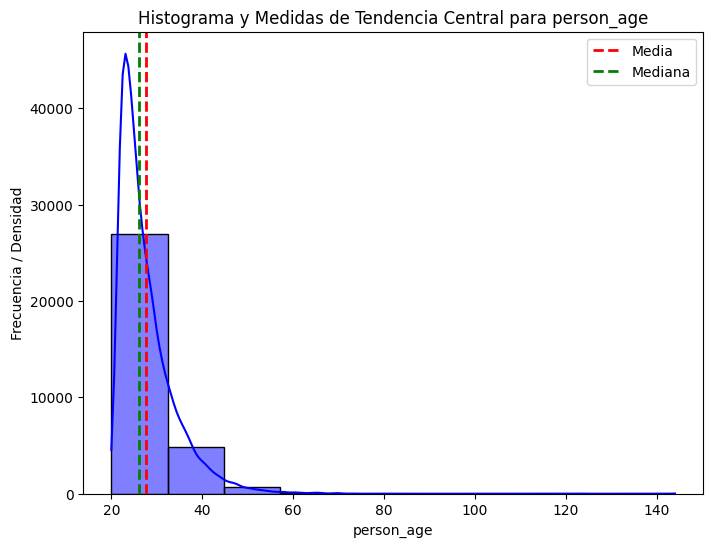

Columna: person_age
Media: 27.73459992019889
Mediana: 26.0
--------------------


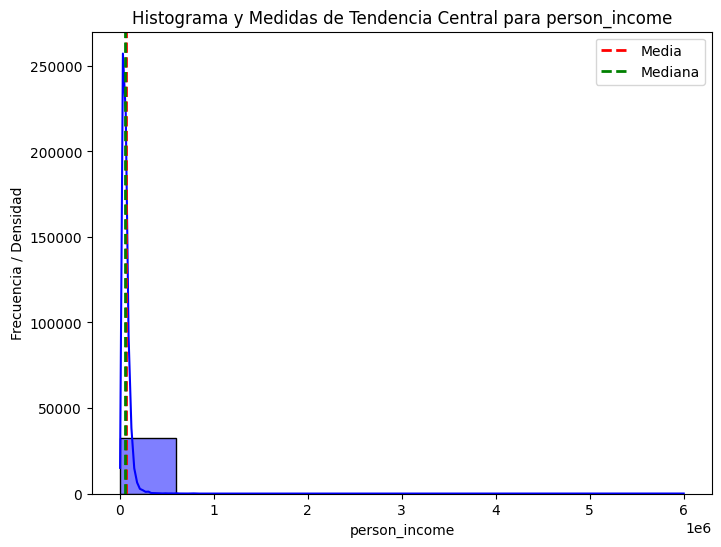

Columna: person_income
Media: 66074.84846996715
Mediana: 55000.0
--------------------


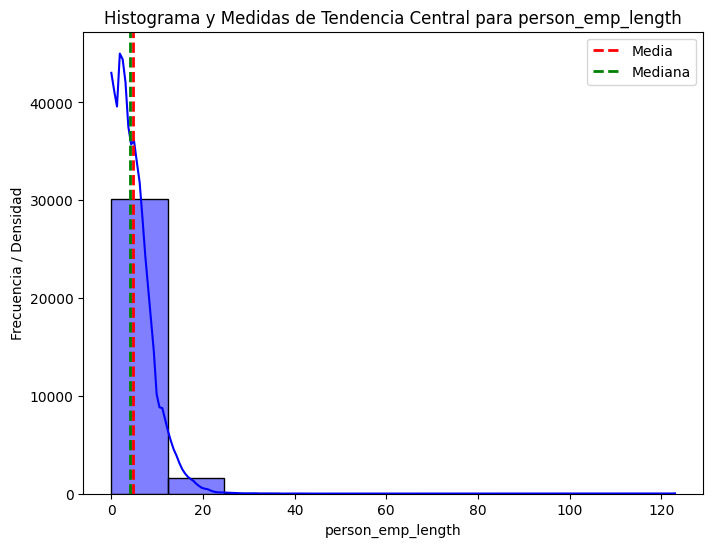

Columna: person_emp_length
Media: 4.789686296787225
Mediana: 4.0
--------------------


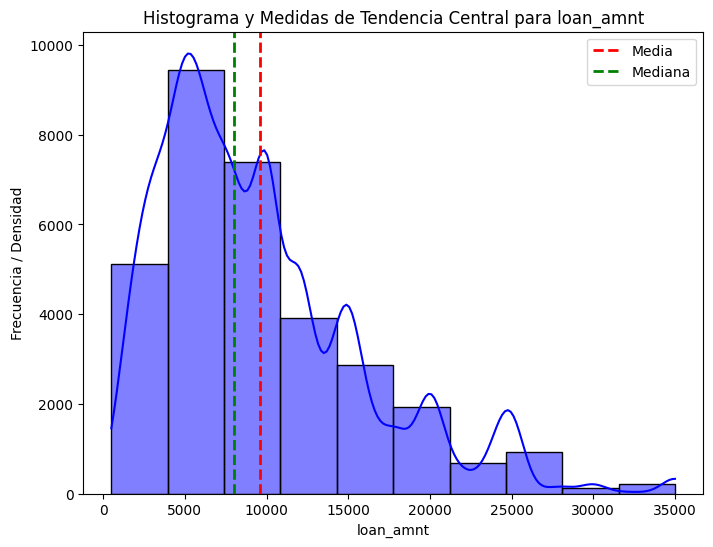

Columna: loan_amnt
Media: 9589.371105859243
Mediana: 8000.0
--------------------


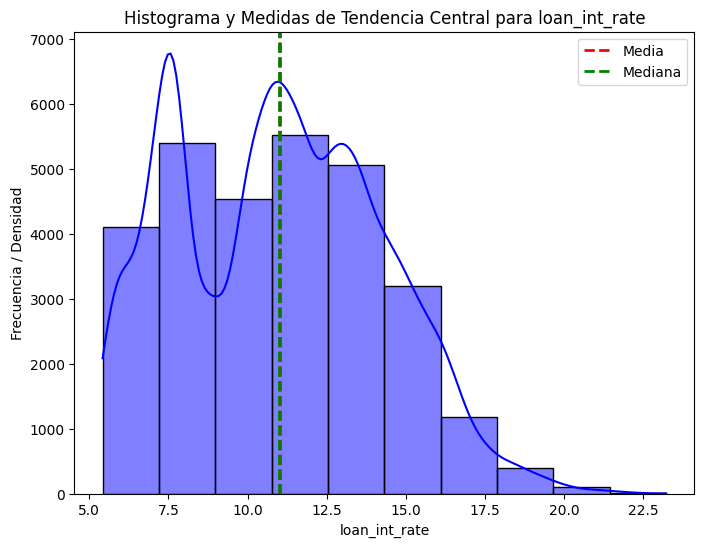

Columna: loan_int_rate
Media: 11.011694892245036
Mediana: 10.99
--------------------


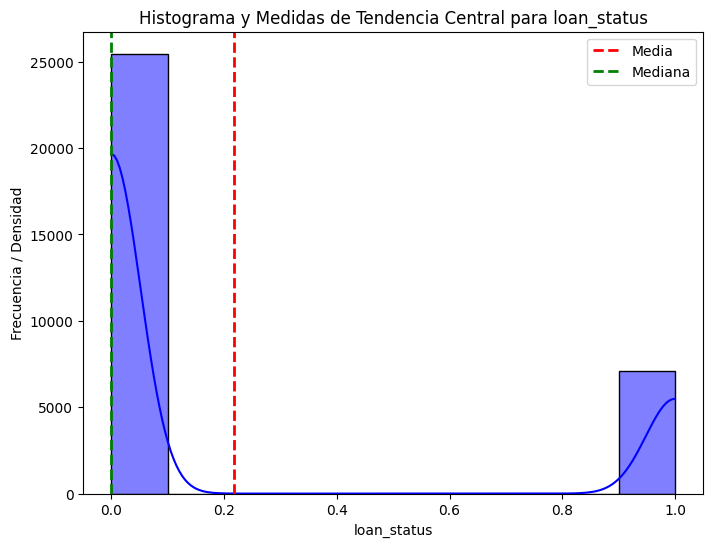

Columna: loan_status
Media: 0.21816396059052823
Mediana: 0.0
--------------------


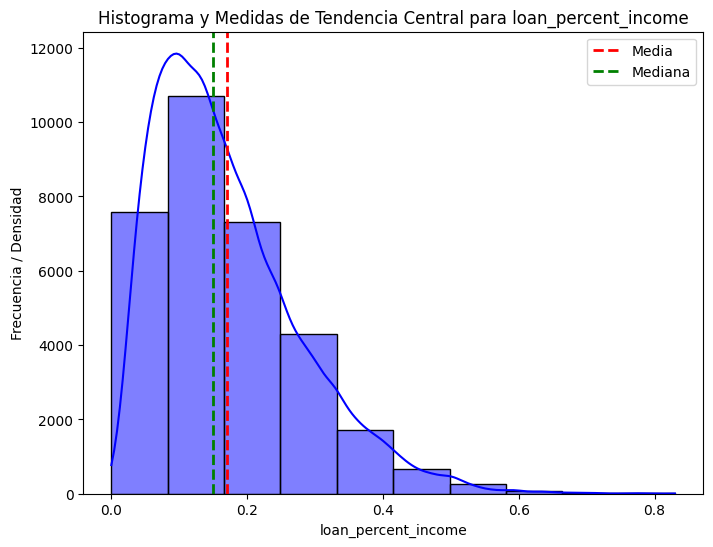

Columna: loan_percent_income
Media: 0.1702034928332464
Mediana: 0.15
--------------------


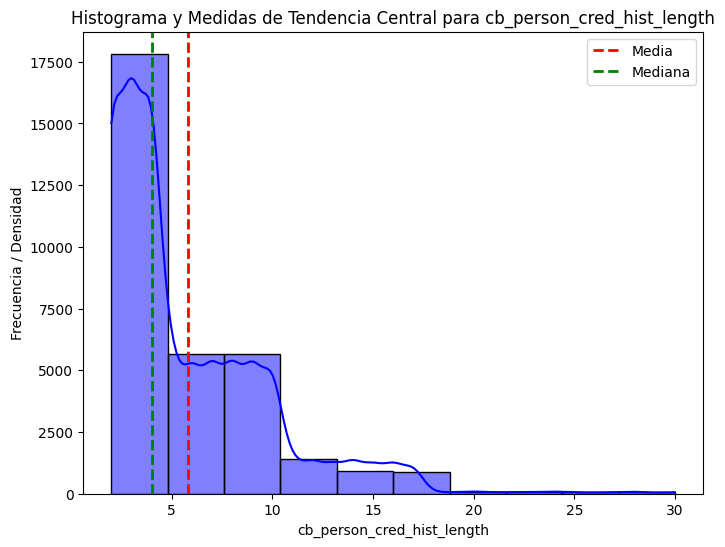

Columna: cb_person_cred_hist_length
Media: 5.804211043246064
Mediana: 4.0
--------------------


In [26]:
# Calcular la media y la mediana con histograma por cada variable númerica

for columna in columnas_numericas.columns:
    media = columnas_numericas[columna].mean()
    mediana = columnas_numericas[columna].median()

    plt.figure(figsize=(8, 6))
    sns.histplot(columnas_numericas[columna], kde=True, color='blue', bins=10)
    plt.axvline(media, color='red', linestyle='dashed', linewidth=2, label='Media')
    plt.axvline(mediana, color='green', linestyle='dashed', linewidth=2, label='Mediana')

    plt.title(f'Histograma y Medidas de Tendencia Central para {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia / Densidad')
    plt.legend()

    plt.show()

    print(f'Columna: {columna}')
    print(f'Media: {media}')
    print(f'Mediana: {mediana}')
    print('-' * 20)

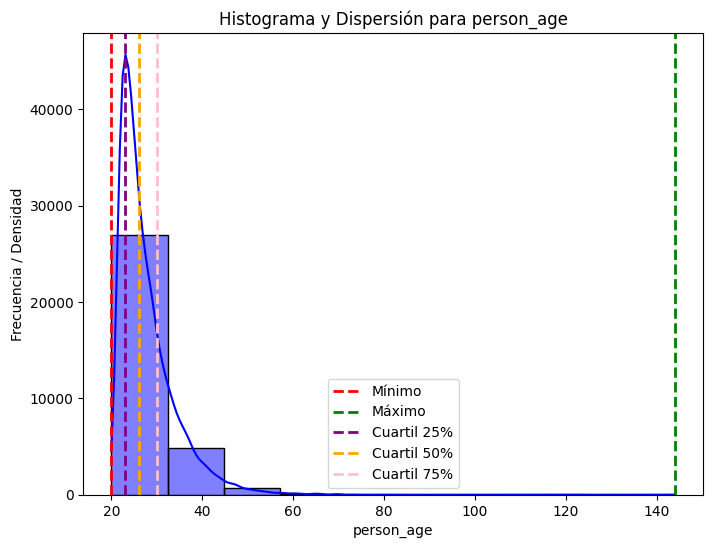

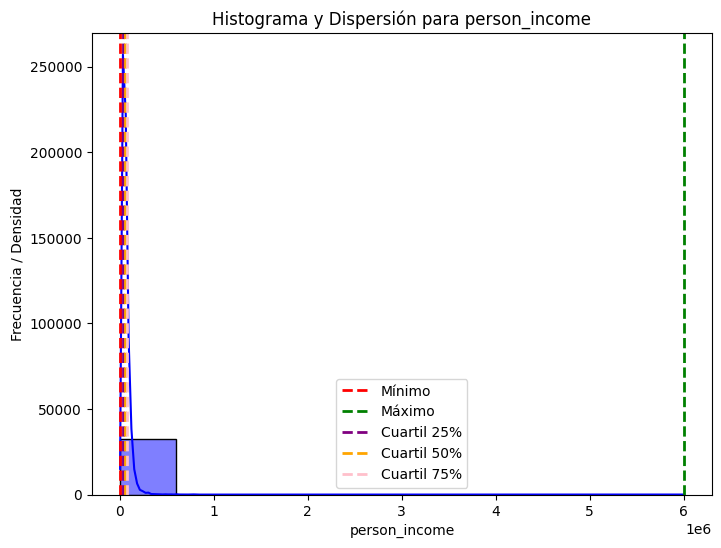

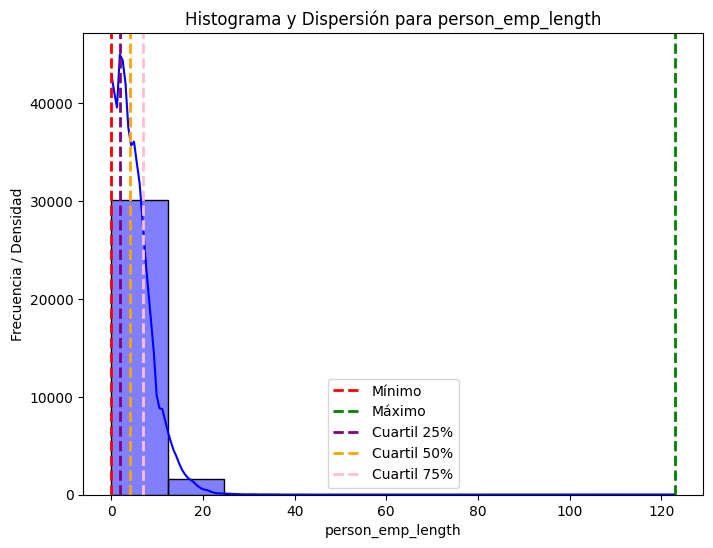

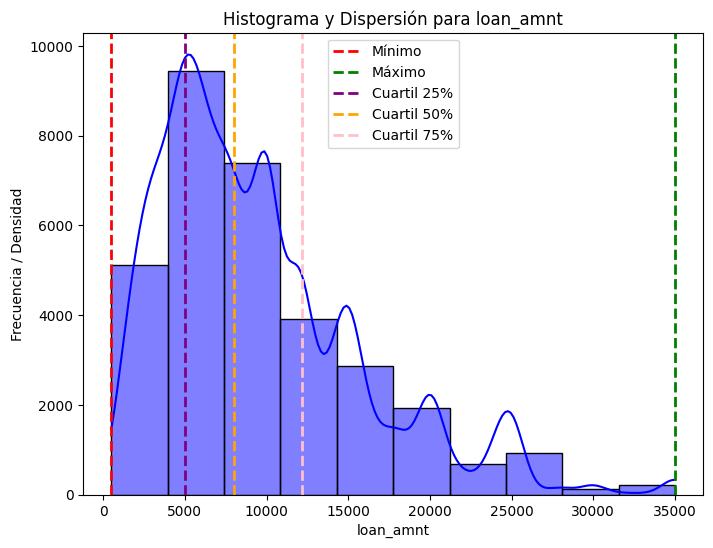

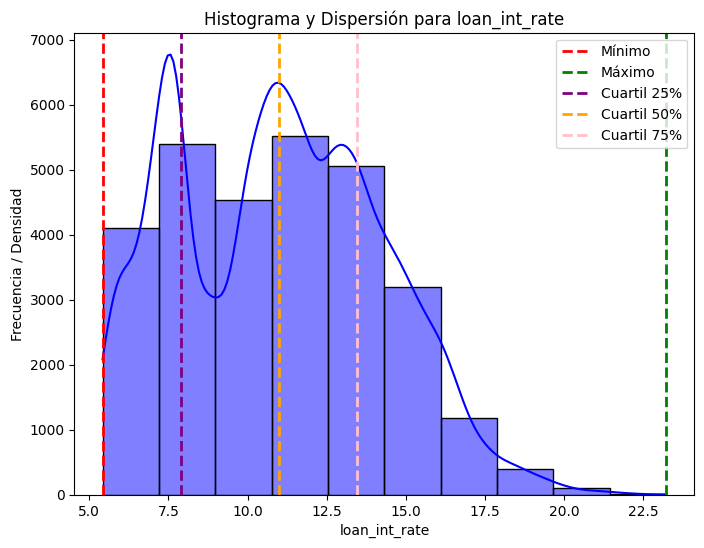

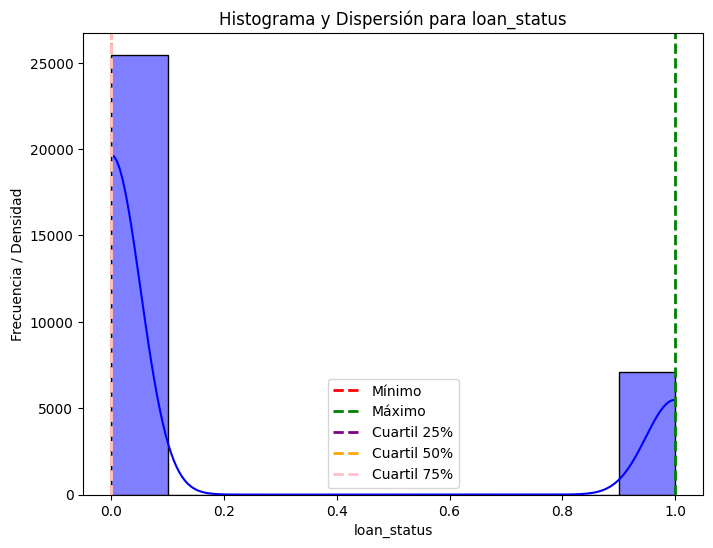

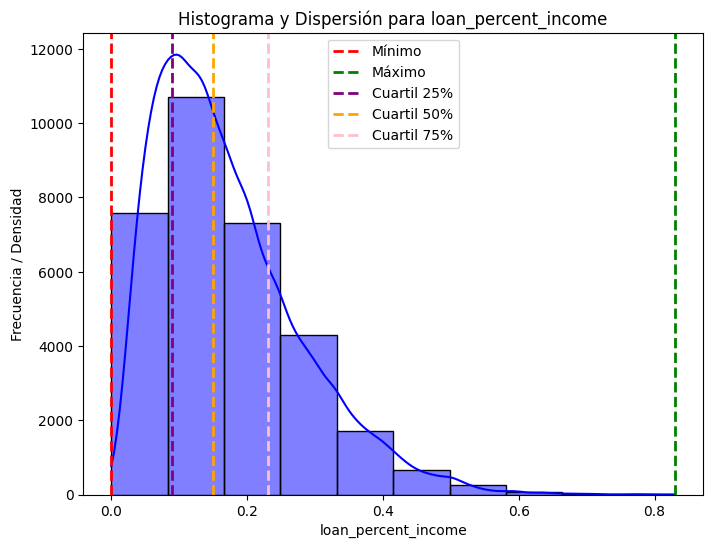

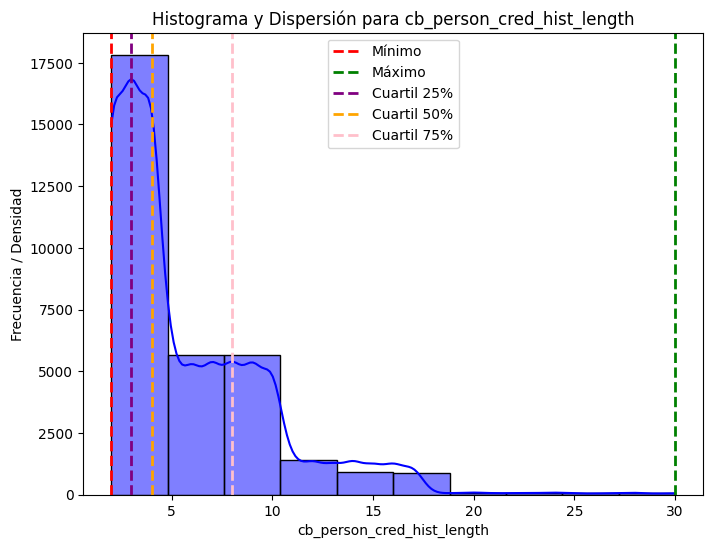

In [27]:
#Dispersión o variabilidad (min, max, desviación estándar, cuartiles) por cada variable numérica

for columna in columnas_numericas.columns:
    minimo = columnas_numericas[columna].min()
    maximo = columnas_numericas[columna].max()
    desviacion_estandar = columnas_numericas[columna].std()
    cuartiles = columnas_numericas[columna].quantile([0.25, 0.50, 0.75])

    # Crear un histograma para la columna numérica
    plt.figure(figsize=(8, 6))
    sns.histplot(columnas_numericas[columna], kde=True, color='blue', bins=10)

    # Agregar líneas verticales para representar los valores de min, max y los cuartiles
    plt.axvline(minimo, color='red', linestyle='dashed', linewidth=2, label='Mínimo')
    plt.axvline(maximo, color='green', linestyle='dashed', linewidth=2, label='Máximo')
    plt.axvline(cuartiles[0.25], color='purple', linestyle='dashed', linewidth=2, label='Cuartil 25%')
    plt.axvline(cuartiles[0.50], color='orange', linestyle='dashed', linewidth=2, label='Cuartil 50%')
    plt.axvline(cuartiles[0.75], color='pink', linestyle='dashed', linewidth=2, label='Cuartil 75%')

    plt.title(f'Histograma y Dispersión para {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia / Densidad')
    plt.legend()

    plt.show()

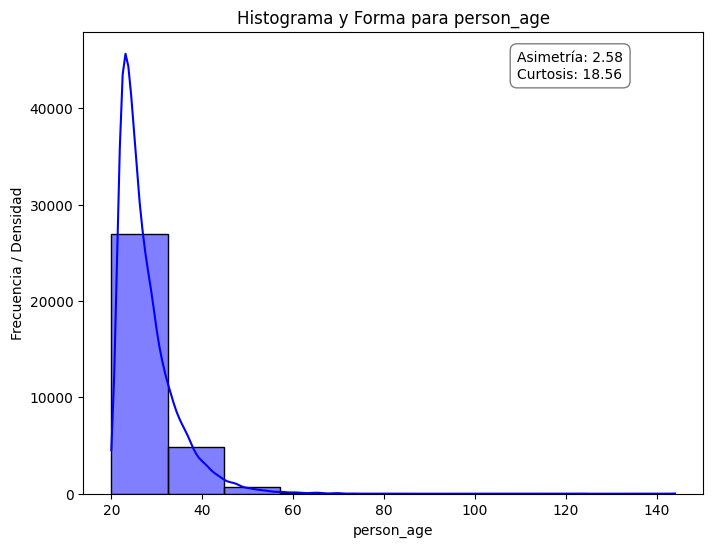

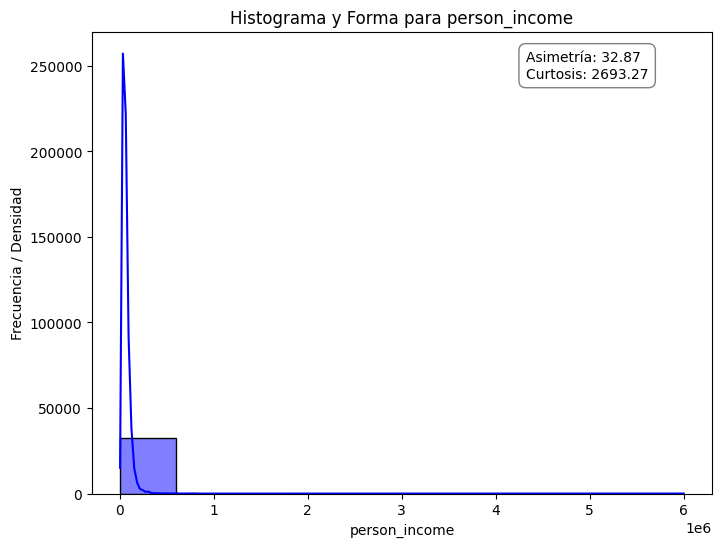

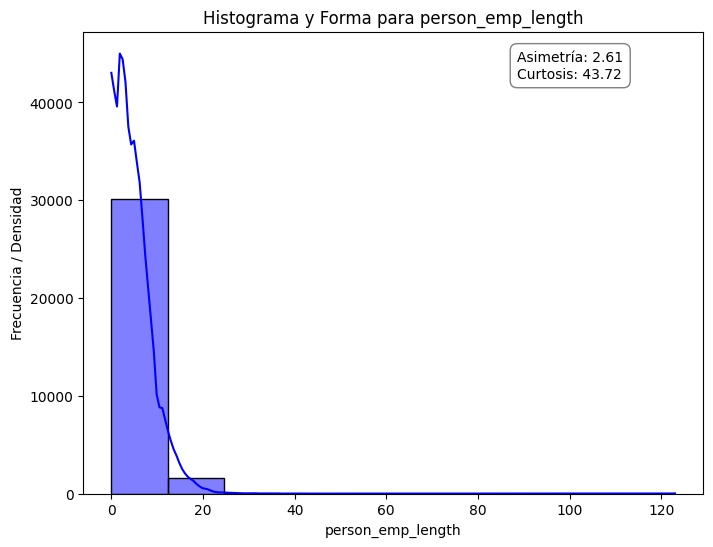

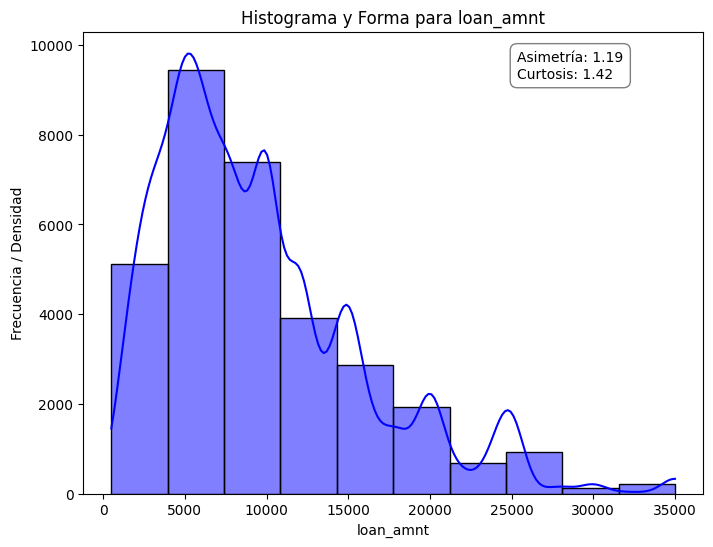

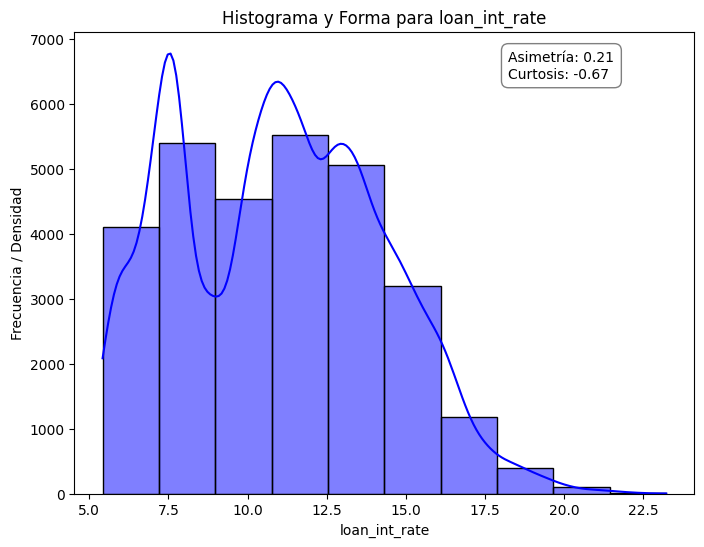

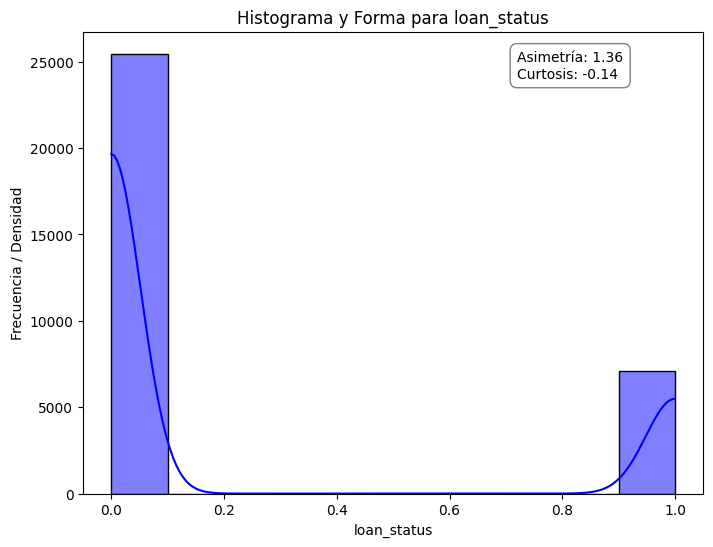

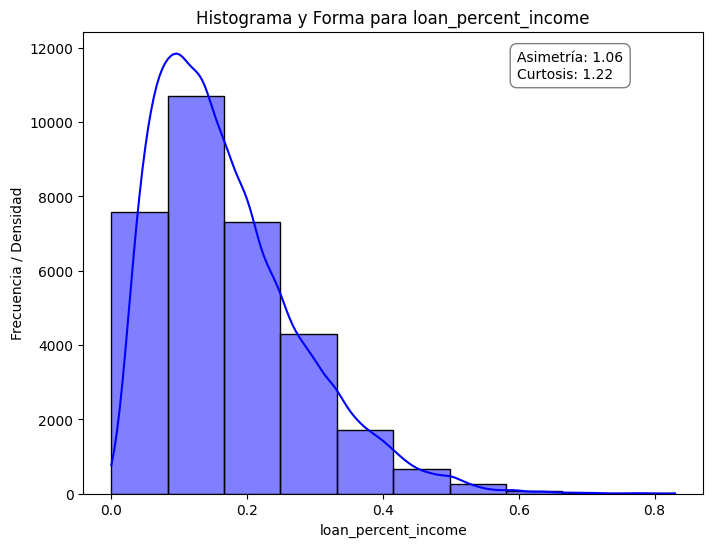

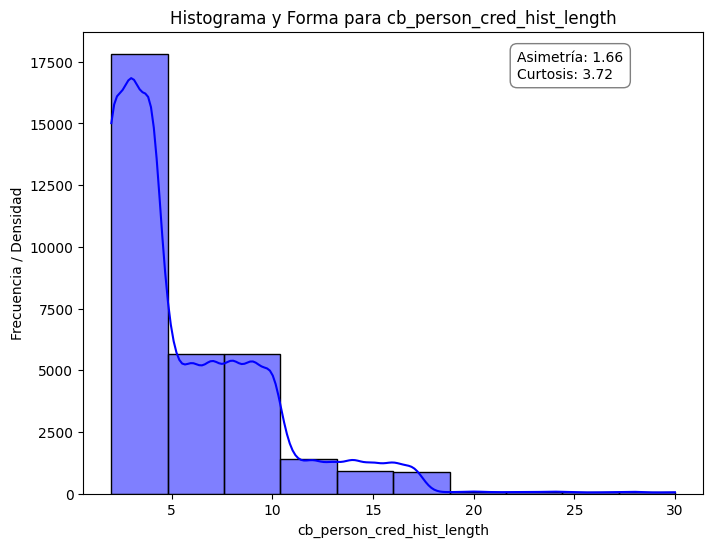

In [28]:
#Forma (asimetría y curtosis) por cada variable numérica

for columna in columnas_numericas.columns:
    asimetria = columnas_numericas[columna].skew()
    curtosis = columnas_numericas[columna].kurtosis()

    # Crear un histograma para la columna numérica
    plt.figure(figsize=(8, 6))
    sns.histplot(columnas_numericas[columna], kde=True, color='blue', bins=10)

    plt.title(f'Histograma y Forma para {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia / Densidad')

    # Agregar texto para mostrar los valores de asimetría y curtosis
    plt.text(
        x=0.7,
        y=0.9,
        s=f'Asimetría: {asimetria:.2f}\nCurtosis: {curtosis:.2f}',
        transform=plt.gca().transAxes,
        bbox=dict(boxstyle='round, pad=0.5', edgecolor='gray', facecolor='white')
    )

    plt.show()

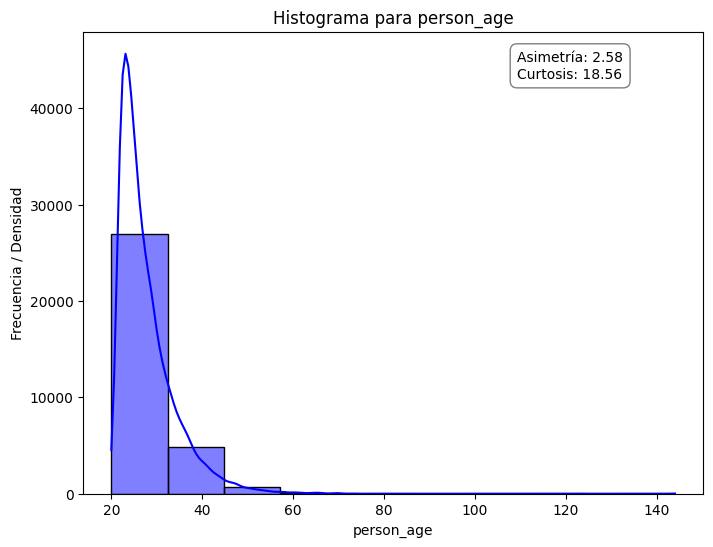

Clasificación de person_age:
  - Asimetría: Positiva
  - Curtosis: Leptocúrtica
--------------------


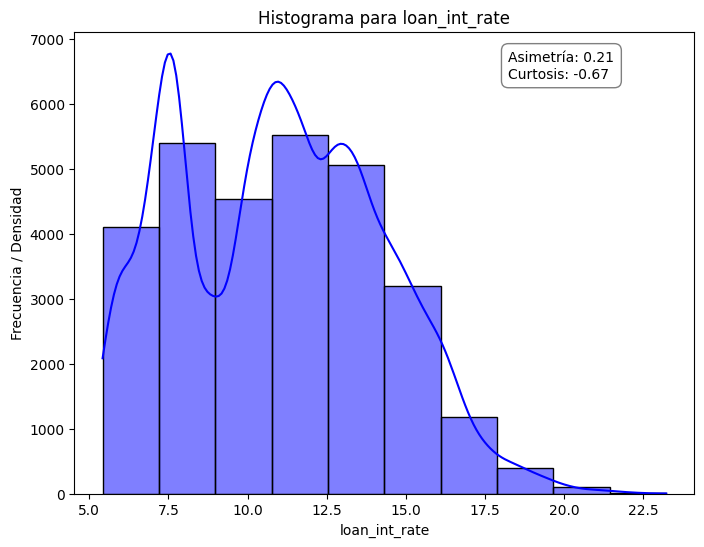

In [31]:
# Clasifica las variables person_age y loan_in_rate según los valores observados de asimetría y curtosis

for columna in ['person_age', 'loan_int_rate']:
    asimetria = columnas_numericas[columna].skew()
    curtosis = columnas_numericas[columna].kurtosis()

    # Crear un histograma para la columna numérica
    plt.figure(figsize=(8, 6))
    sns.histplot(columnas_numericas[columna], kde=True, color='blue', bins=10)

    plt.title(f'Histograma para {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia / Densidad')

    # Agregar texto para mostrar los valores de asimetría y curtosis
    plt.text(
        x=0.7,
        y=0.9,
        s=f'Asimetría: {asimetria:.2f}\nCurtosis: {curtosis:.2f}',
        transform=plt.gca().transAxes,
        bbox=dict(boxstyle='round, pad=0.5', edgecolor='gray', facecolor='white')
    )

    plt.show()

    # Clasificar las variables en función de la asimetría y curtosis
    if columna == 'person_age':
        if asimetria < 0:
            clasificacion_asimetria = 'Negativa'
        elif asimetria > 0:
            clasificacion_asimetria = 'Positiva'
        else:
            clasificacion_asimetria = 'Simétrica'

        if curtosis < 0:
            clasificacion_curtosis = 'Platicúrtica'
        elif curtosis > 0:
            clasificacion_curtosis = 'Leptocúrtica'
        else:
            clasificacion_curtosis = 'Mesocúrtica'

        print(f'Clasificación de {columna}:')
        print(f'  - Asimetría: {clasificacion_asimetria}')
        print(f'  - Curtosis: {clasificacion_curtosis}')
        print('-' * 20)

#¿Se corresponde con lo obtenido en el cálculo de asimetría? Como verás, los datos reales son más complejos que la teoría. Por esta razón, recuerda siempre acompañar el análisis de la asimetría con algún gráfico como un histograma.

Sí corresponde, sin embargo es muy díficil determinar el comportamiento de una curva o tendencia de los datos si sólo nos enfocamos a los datos, por eso es una buena práctica el tener un gráfico histograma asociado para entender mejor el comportamiento

5. Emplea boxplots para mostrar la distribución de los datos a través de sus cuartiles.

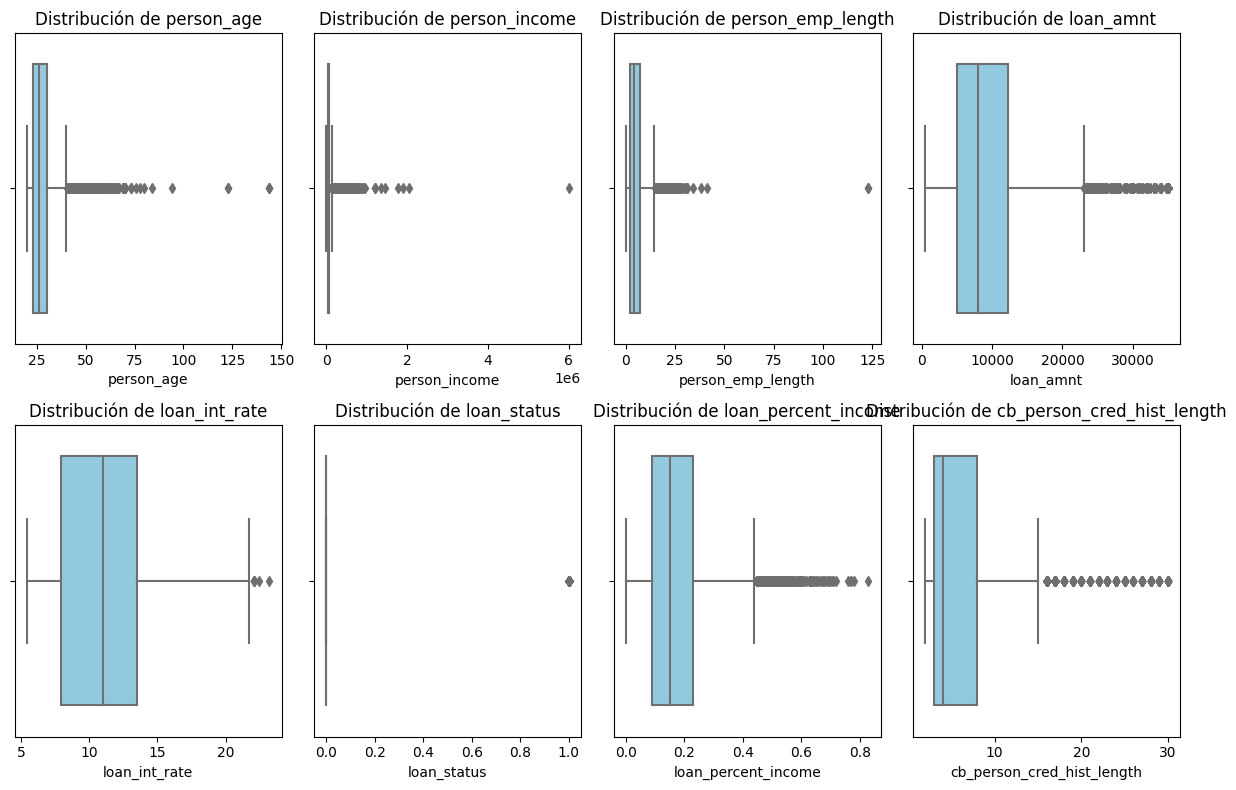

In [35]:
#Emplea boxplots para mostrar la distribución de los datos a través de sus cuartiles.
plt.figure(figsize=(12, 8))
for i, columna in enumerate(columnas_numericas.columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=columna, data=df, color='skyblue')
    plt.title(f'Distribución de {columna}')
    plt.xlabel(columna)

plt.tight_layout()
plt.show()

*   Como podrás observar hay valores atípicos en todas las variables. Ejecuta el siguiente código para identificar los valores atípicos en la variable `person_age`

In [32]:
percentile_25 = df["person_age"].quantile(0.25)
percentile_75 = df["person_age"].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
IQR_outliers = df[(df["person_age"] < lower_limit) | (df["person_age"] > upper_limit)]
IQR_outliers

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
29121,50,900000,MORTGAGE,11.0,DEBTCONSOLIDATION,B,30000,12.69,0,0.03,N,15
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# Análisis de variables categóricas

 6. Obtén las siguientes estadísticas descriptivas para todas las variables categóricas:
*   Tendencia central (moda)
*   Cardinalidad (cantidad de valores únicos)
*   Recuentos únicos (número de ocurrencias para cada valor único)

**NOTA**. Un resumen de estas estadísticas, puedes obtenerlas indicando en la función `describe()` que se incluirán sólo las variables de tipo object, que en este caso coinciden con las categóricas: `describe(include = 'object')`. Para los recuentos utiliza la función `df["columna"].value_counts()`

In [36]:
# Obtener las columnas categóricas
columnas_categoricas = df.select_dtypes(include=['object'])

# Calcular la moda (valor más frecuente) para cada columna categórica
moda = columnas_categoricas.mode().iloc[0]

# Calcular la cardinalidad (cantidad de valores únicos) para cada columna categórica
cardinalidad = columnas_categoricas.nunique()

# Calcular los recuentos únicos (número de ocurrencias para cada valor único)
recuentos_unicos = {}
for columna in columnas_categoricas.columns:
    recuentos_unicos[columna] = columnas_categoricas[columna].value_counts()

# Mostrar las estadísticas descriptivas
print("Moda (Valor más frecuente) para cada columna categórica:")
print(moda)
print("\nCardinalidad (Cantidad de valores únicos) para cada columna categórica:")
print(cardinalidad)
print("\nRecuentos únicos (Número de ocurrencias para cada valor único) para cada columna categórica:")
for columna, recuento in recuentos_unicos.items():
    print(f"{columna}:\n{recuento}\n")

Moda (Valor más frecuente) para cada columna categórica:
person_home_ownership             RENT
loan_intent                  EDUCATION
loan_grade                           A
cb_person_default_on_file            N
Name: 0, dtype: object

Cardinalidad (Cantidad de valores únicos) para cada columna categórica:
person_home_ownership        4
loan_intent                  6
loan_grade                   7
cb_person_default_on_file    2
dtype: int64

Recuentos únicos (Número de ocurrencias para cada valor único) para cada columna categórica:
person_home_ownership:
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: person_home_ownership, dtype: int64

loan_intent:
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: loan_intent, dtype: int64

loan_grade:
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: loan_grade, dtype: int64


7. Utiliza gráficos de barras por variable para representar la frecuencia de cada categoría.

**NOTA**. seaborn posee un gráfico de recuento, para variables categóricas, que calcula la frecuencia de cada categoría sin necesidad de utilizar la función `value_counts()`. Para generarlo debes indicar la columna: `sns.countplot(x="columna", data=df) `

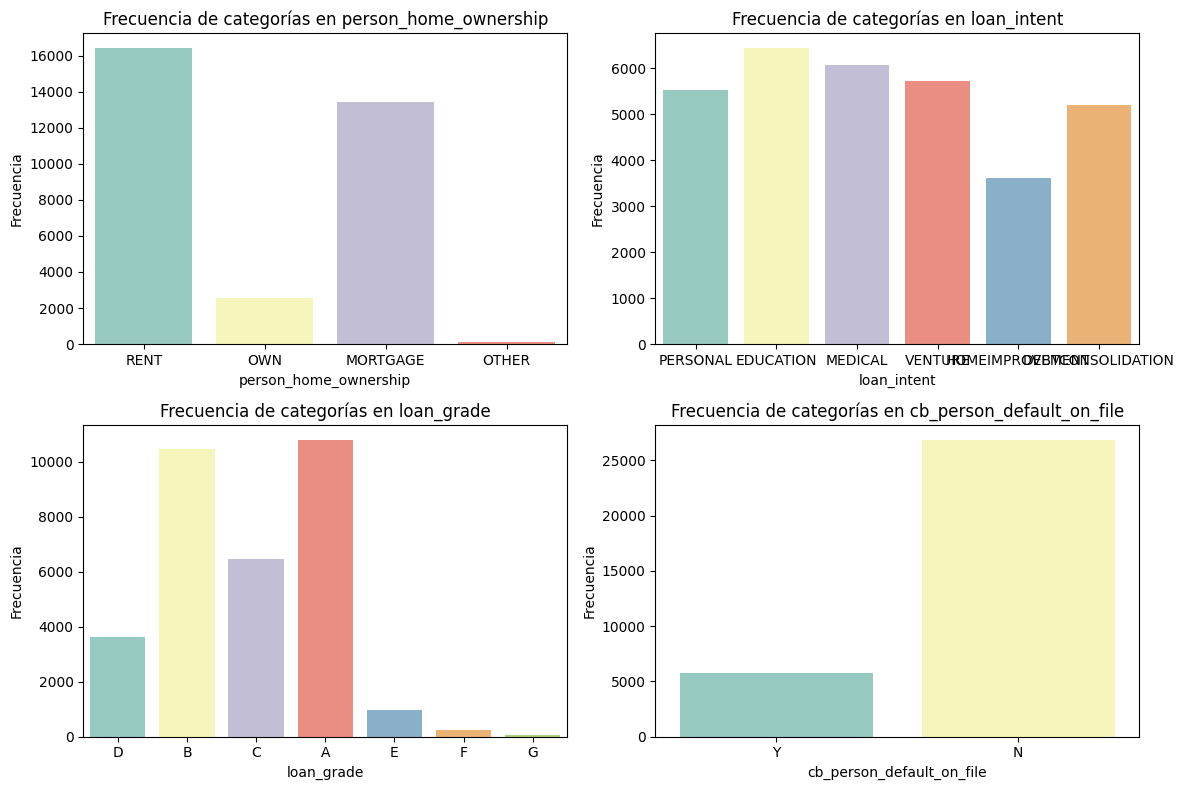

In [37]:
# Crear gráficos de barras para cada columna categórica
plt.figure(figsize=(12, 8))
for i, columna in enumerate(columnas_categoricas.columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=columna, data=df, palette='Set3')
    plt.title(f'Frecuencia de categorías en {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# **Parte 2**. Análisis de correlación (bivariante y multivariante)

La variable `loan_status` será la variable de salida (o a predecir en un modelo de ML). Analiza su relación con el resto de las variables a través de los siguientes gráficos:

8. Un box plot para visualizar la distribución de `loan_percent_income` según el `load_status`. Interpreta el resultado.

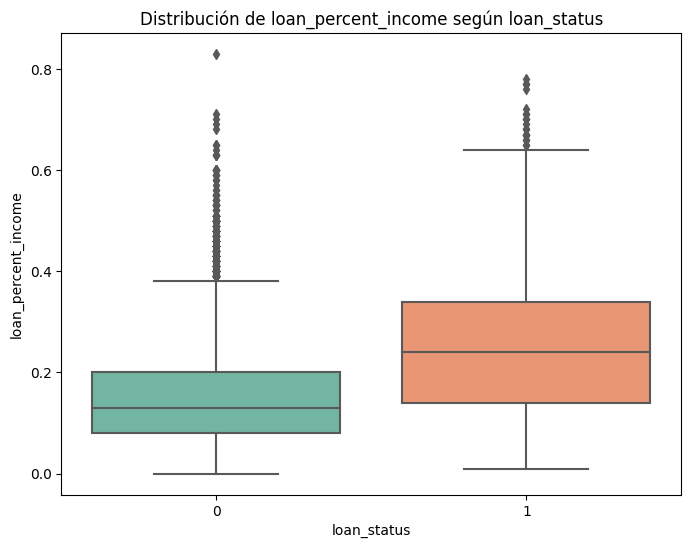

In [38]:
# Crear un boxplot para visualizar la distribución de loan_percent_income según loan_status
plt.figure(figsize=(8, 6))
sns.boxplot(x='loan_status', y='loan_percent_income', data=df, palette='Set2')
plt.title('Distribución de loan_percent_income según loan_status')
plt.xlabel('loan_status')
plt.ylabel('loan_percent_income')
plt.show()

 9. En los gráficos de barras que obtuviste en el ejercicio 7, separa el conteo según el `load_status`, utilizando el parámetro `hue`.

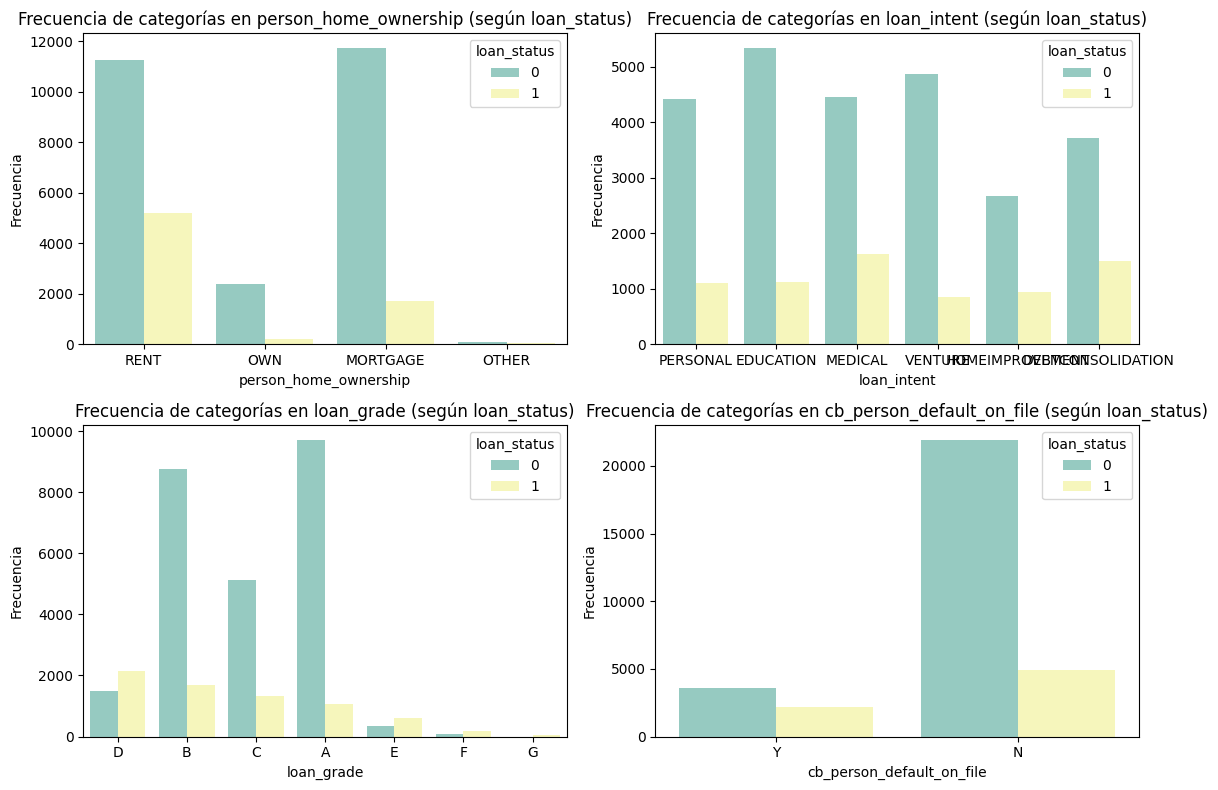

In [39]:
plt.figure(figsize=(12, 8))
for i, columna in enumerate(columnas_categoricas.columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=columna, data=df, palette='Set3', hue='loan_status')
    plt.title(f'Frecuencia de categorías en {columna} (según loan_status)')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

10. Un mapa de calor con los valores de correlación de todas las variables del dataframe.
*   ¿Qué variable tiene mayor correlación con `loan_status`?

<ipython-input-43-4b212348587f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


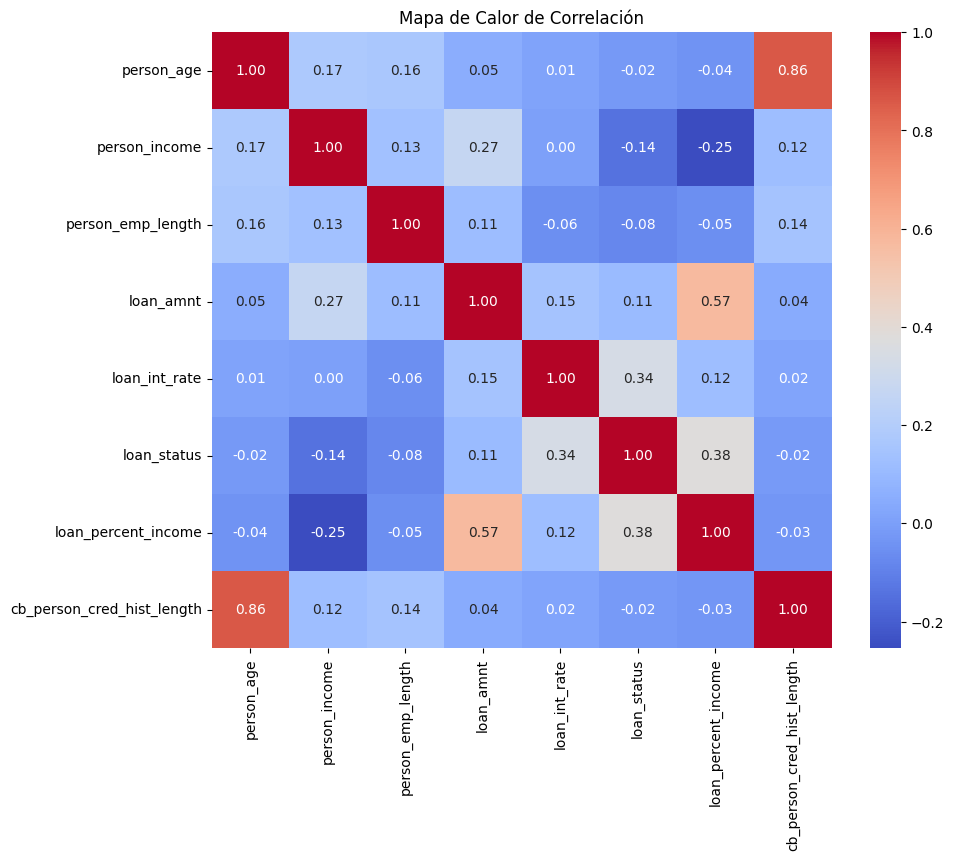

Variable con mayor correlación con loan_status: loan_percent_income


In [43]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Crear un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlación')
plt.show()

# Encontrar la variable con mayor correlación con loan_status
highest_correlation = correlation_matrix['loan_status'].abs().sort_values(ascending=False)
print(f"Variable con mayor correlación con loan_status: {highest_correlation.index[1]}")